<a href="https://colab.research.google.com/github/chirusainanda/Data-Cleaning/blob/main/SuperStore_Sales_Profit_Discount_Predict_%F0%9F%9B%8D%EF%B8%8F%F0%9F%9B%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
vivek468_superstore_dataset_final_path = kagglehub.dataset_download('vivek468/superstore-dataset-final')

print('Data source import complete.')


Data source import complete.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from wordcloud import WordCloud

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
df = pd.read_csv("/kaggle/input/superstore-dataset-final/Sample - Superstore.csv", encoding='latin1')
pd.set_option('display.max_columns', None)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# remove unnecessary columns
df = df.drop(['Row ID', 'Order ID', 'Ship Date', 'Customer ID', 'Customer Name','Product ID','Country','Postal Code'], axis=1)

In [5]:
df.head()

,Order Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11/8/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,11/8/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,6/12/2016,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,10/11/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,10/11/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9994 non-null   object 
 1   Ship Mode     9994 non-null   object 
 2   Segment       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Product Name  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


In [7]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


## <b> <span style='color:#e67e22'>Step 5</span> <span style='color:'>|</span> <span style='color:#e74c3c ;font-style: italic;animation: pulse 2s infinite;'>Check Null & Duplicate Values</span></b>

In [8]:
# check missing values
print(df.isnull().sum())
# check duplicate
print("__________Duplicates__________")
print(df.duplicated().sum())
# remove duplicates
df.drop_duplicates(inplace=True)
print("Removed Duplicates :")
print(df.duplicated().sum())

Order Date      0
Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64
__________Duplicates__________
1
Removed Duplicates :
0


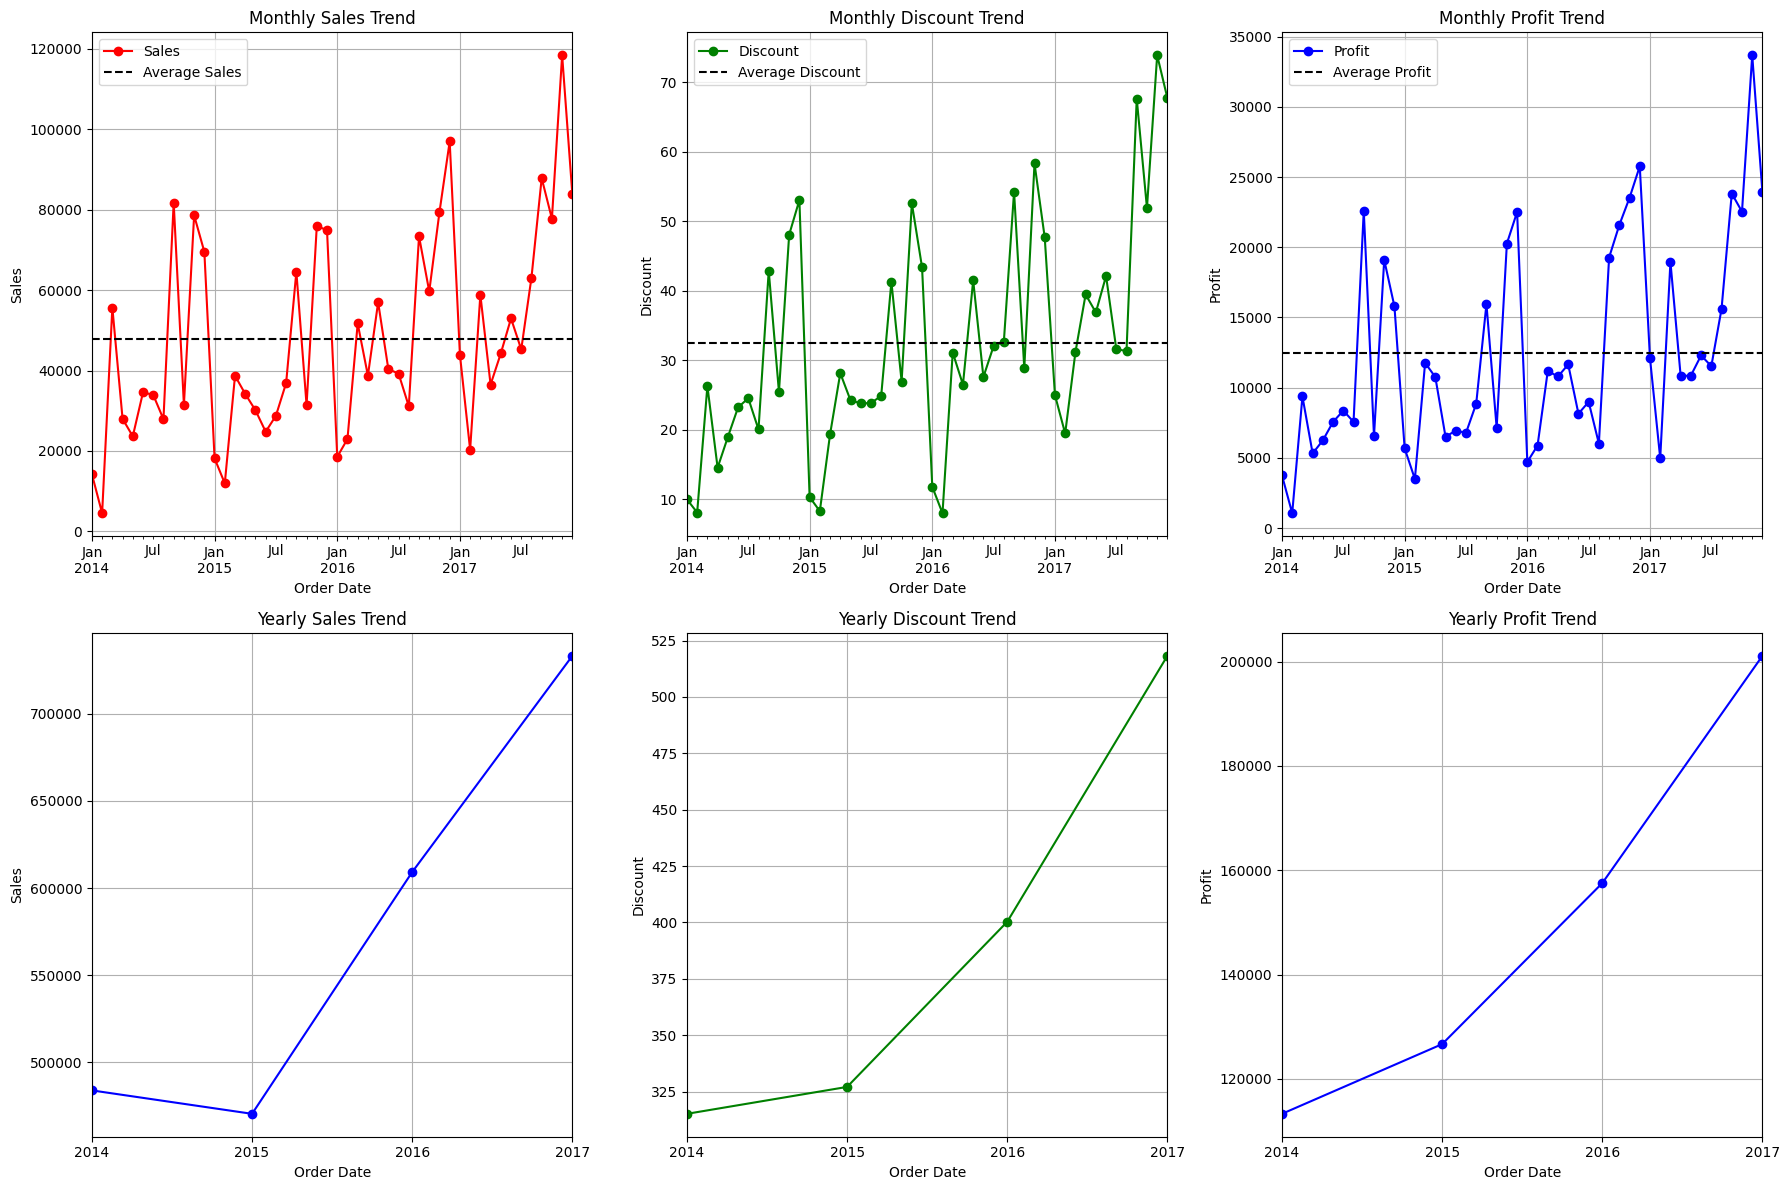

In [9]:
# convert negative values to Positive
df['Profit'] = df['Profit'].abs()

df['Order Date'] = pd.to_datetime(df['Order Date'])

# Aggregate sales data by month
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_discount = df.groupby(df['Order Date'].dt.to_period('M'))['Discount'].sum()
monthly_profit = df.groupby(df['Order Date'].dt.to_period('M'))['Profit'].sum()

# Calculate average values
avg_sales = monthly_sales.mean()
avg_discount = monthly_discount.mean()
avg_profit = monthly_profit.mean()

# Aggregate sales data by year
yearly_sales = df.groupby(df['Order Date'].dt.to_period('Y'))['Sales'].sum()
yearly_discount = df.groupby(df['Order Date'].dt.to_period('Y'))['Discount'].sum()
yearly_profit = df.groupby(df['Order Date'].dt.to_period('Y'))['Profit'].sum()

# Create a figure with 2x3 subplots
plt.figure(figsize=(18, 12))

# Plot monthly sales and discount trend
plt.subplot(2, 3, 1)
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend', color='red')
# add average sales line
plt.axhline(y=avg_sales, color='black', linestyle='--', label='Average Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
monthly_discount.plot(kind='line', marker='o', title='Monthly Discount Trend', color='green')
plt.axhline(y=avg_discount, color='black', linestyle='--', label='Average Discount')
plt.xlabel('Order Date')
plt.ylabel('Discount')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 3)
monthly_profit.plot(kind='line', marker='o', title='Monthly Profit Trend', color='blue')
# add average profit line
plt.axhline(y=avg_profit, color='black', linestyle='--', label='Average Profit')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)

# Plot yearly sales trend
plt.subplot(2, 3, 4)
yearly_sales.plot(kind='line', marker='o', title='Yearly Sales Trend', color='blue')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.grid(True)

# Plot yearly discount trend
plt.subplot(2, 3, 5)
yearly_discount.plot(kind='line', marker='o', title='Yearly Discount Trend', color='green')
plt.xlabel('Order Date')
plt.ylabel('Discount')
plt.grid(True)

# Plot yearly profit trend
plt.subplot(2, 3, 6)
yearly_profit.plot(kind='line', marker='o', title='Yearly Profit Trend', color='blue')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.grid(True)

plt.tight_layout()
plt.show()


In [10]:
# Assuming df is already defined and 'Order Date' is already converted to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Filter data for the years 2015 and 2017
df_2015_2017 = df[(df['Order Date'].dt.year == 2015) | (df['Order Date'].dt.year == 2017)]

# Aggregate data by month
monthly_data = df_2015_2017.groupby(df_2015_2017['Order Date'].dt.to_period('M')).agg({
    'Sales': 'sum',
    'Discount': 'sum',
    'Profit': 'sum'
})

# Calculate the monthly averages for each metric
monthly_avg = monthly_data.groupby(monthly_data.index.year).mean()

# Extract the monthly averages for 2015 and 2017
avg_sales_2015 = monthly_avg.loc[2015, 'Sales']
avg_discount_2015 = monthly_avg.loc[2015, 'Discount']
avg_profit_2015 = monthly_avg.loc[2015, 'Profit']

avg_sales_2017 = monthly_avg.loc[2017, 'Sales']
avg_discount_2017 = monthly_avg.loc[2017, 'Discount']
avg_profit_2017 = monthly_avg.loc[2017, 'Profit']

# Print the results
print(f"Monthly Averages for 2015:")
print(f"Average Sales: {avg_sales_2015}")
print(f"Average Discount: {avg_discount_2015}")
print(f"Average Profit: {avg_profit_2015}")

print(f"\nMonthly Averages for 2017:")
print(f"Average Sales: {avg_sales_2017}")
print(f"Average Discount: {avg_discount_2017}")
print(f"Average Profit: {avg_profit_2017}")


Monthly Averages for 2015:
Average Sales: 39211.04241666667
Average Discount: 27.257500000000004
Average Profit: 10556.448791666668

Monthly Averages for 2017:
Average Sales: 61101.27126666667
Average Discount: 43.185
Average Profit: 16759.304699999997


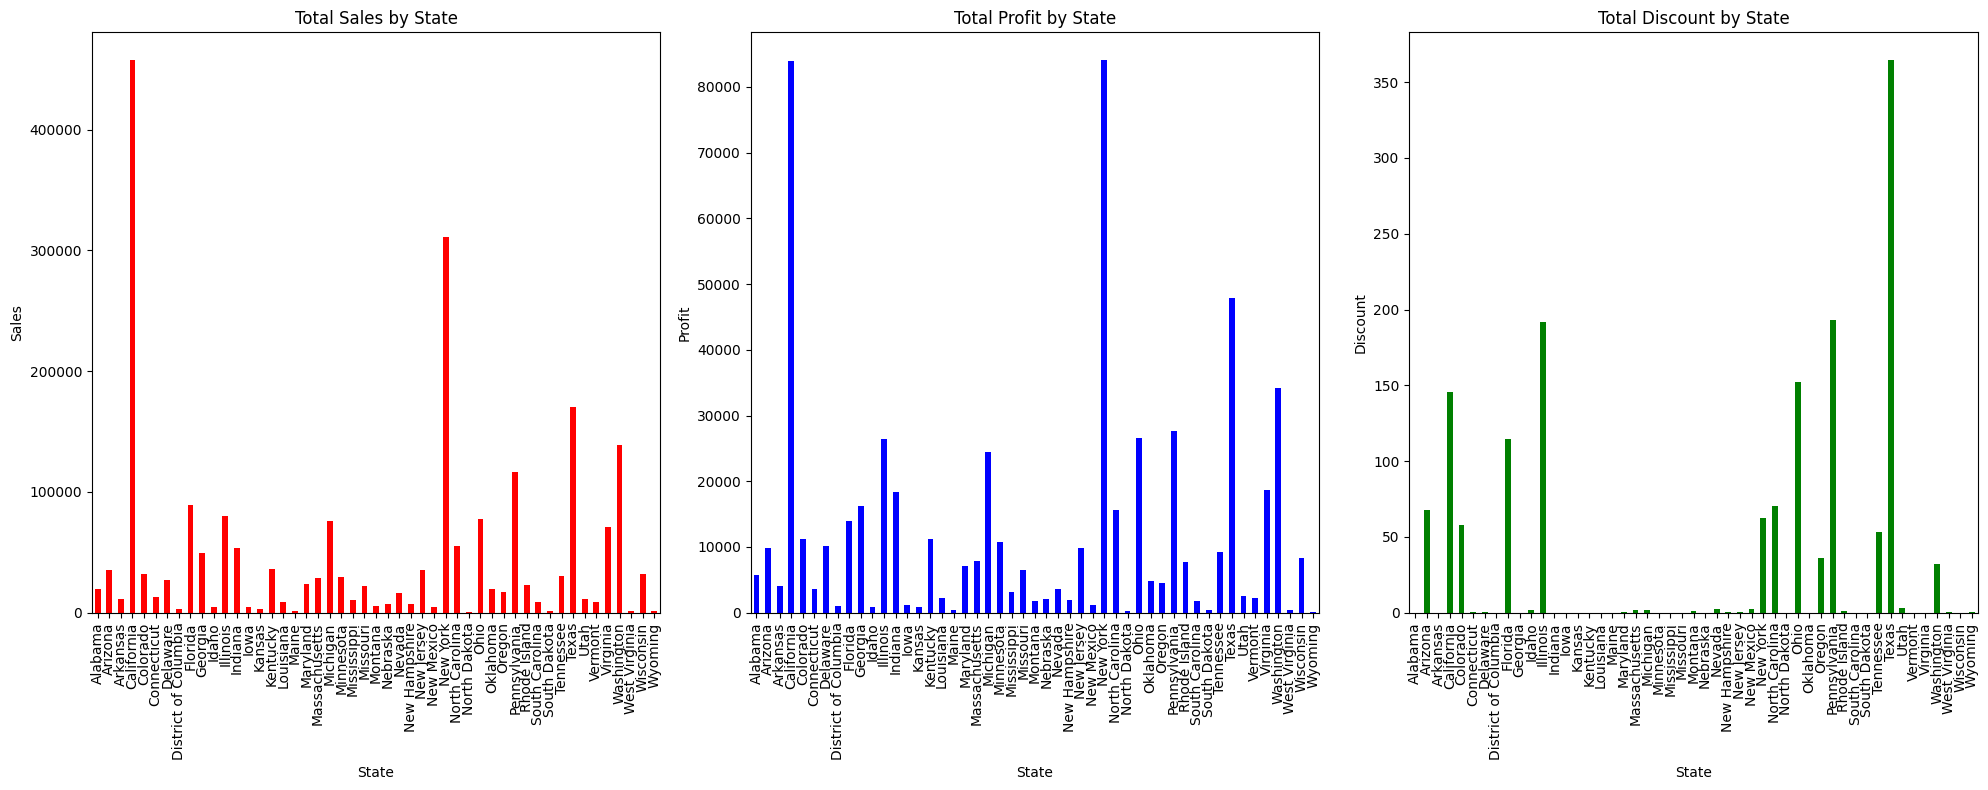

In [11]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

# Plot Total Sales by State
df.groupby('State')['Sales'].sum().plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Total Sales by State')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Sales')

# Plot Total Profit by State
df.groupby('State')['Profit'].sum().plot(kind='bar', ax=axes[1], color='blue')
axes[1].set_title('Total Profit by State')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Profit')

# Plot Total Discount by State
df.groupby('State')['Discount'].sum().plot(kind='bar', ax=axes[2], color='green')
axes[2].set_title('Total Discount by State')
axes[2].set_xlabel('State')
axes[2].set_ylabel('Discount')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


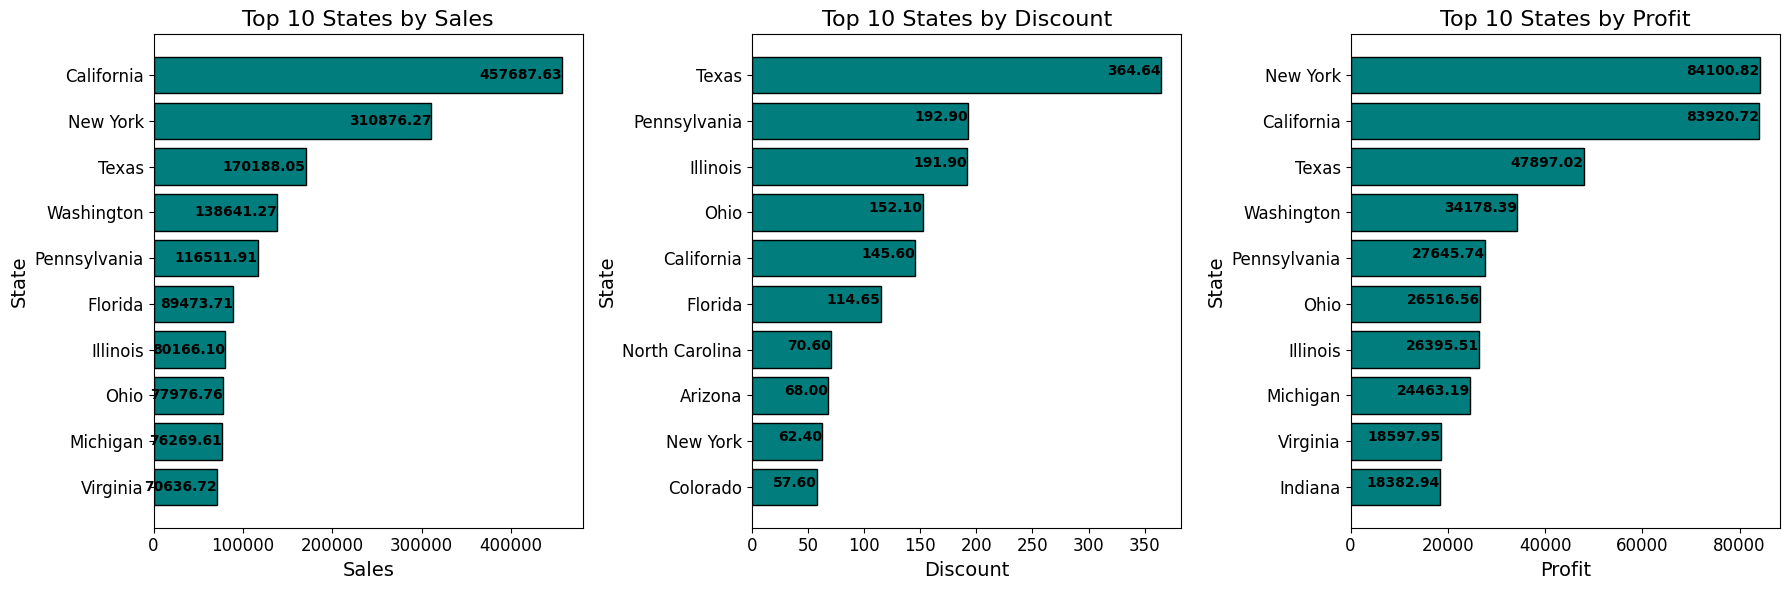

In [12]:
top_states_sales = df.groupby('State')['Sales'].sum().nlargest(10).reset_index()
top_states_discount = df.groupby('State')['Discount'].sum().nlargest(10).reset_index()
top_states_profit = df.groupby('State')['Profit'].sum().nlargest(10).reset_index()


# Create the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for Sales
axes[0].barh(top_states_sales['State'], top_states_sales['Sales'], color='#007d7c', edgecolor='black', linewidth=1)
axes[0].set_title('Top 10 States by Sales', fontsize=16)
axes[0].set_xlabel('Sales', fontsize=14)
axes[0].set_ylabel('State', fontsize=14)
axes[0].invert_yaxis()
axes[0].tick_params(axis='both', which='major', labelsize=12)
for i, v in enumerate(top_states_sales['Sales']):
    axes[0].text(v,i,f'{v:.2f}', va= 'center', ha= 'right', fontsize='10',fontweight='bold')

# Plot for Discount
axes[1].barh(top_states_discount['State'], top_states_discount['Discount'], color='#007d7c', edgecolor='black', linewidth=1)
axes[1].set_title('Top 10 States by Discount', fontsize=16)
axes[1].set_xlabel('Discount', fontsize=14)
axes[1].set_ylabel('State', fontsize=14)
axes[1].invert_yaxis()
axes[1].tick_params(axis='both', which='major', labelsize=12)
for i, v in enumerate(top_states_discount['Discount']):
    axes[1].text(v,i,f'{v:.2f}',ha='right', fontsize='10', fontweight='bold')
# Plot for Profit
axes[2].barh(top_states_profit['State'], top_states_profit['Profit'], color='#007d7c', edgecolor='black', linewidth=1)
axes[2].set_title('Top 10 States by Profit', fontsize=16)
axes[2].set_xlabel('Profit', fontsize=14)
axes[2].set_ylabel('State', fontsize=14)
axes[2].invert_yaxis()
axes[2].tick_params(axis='both', which='major', labelsize=12)
for i, v, in enumerate(top_states_profit['Profit']):
    axes[2].text(v,i,f'{v:.2f}', ha='right', fontsize='10', fontweight='bold')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

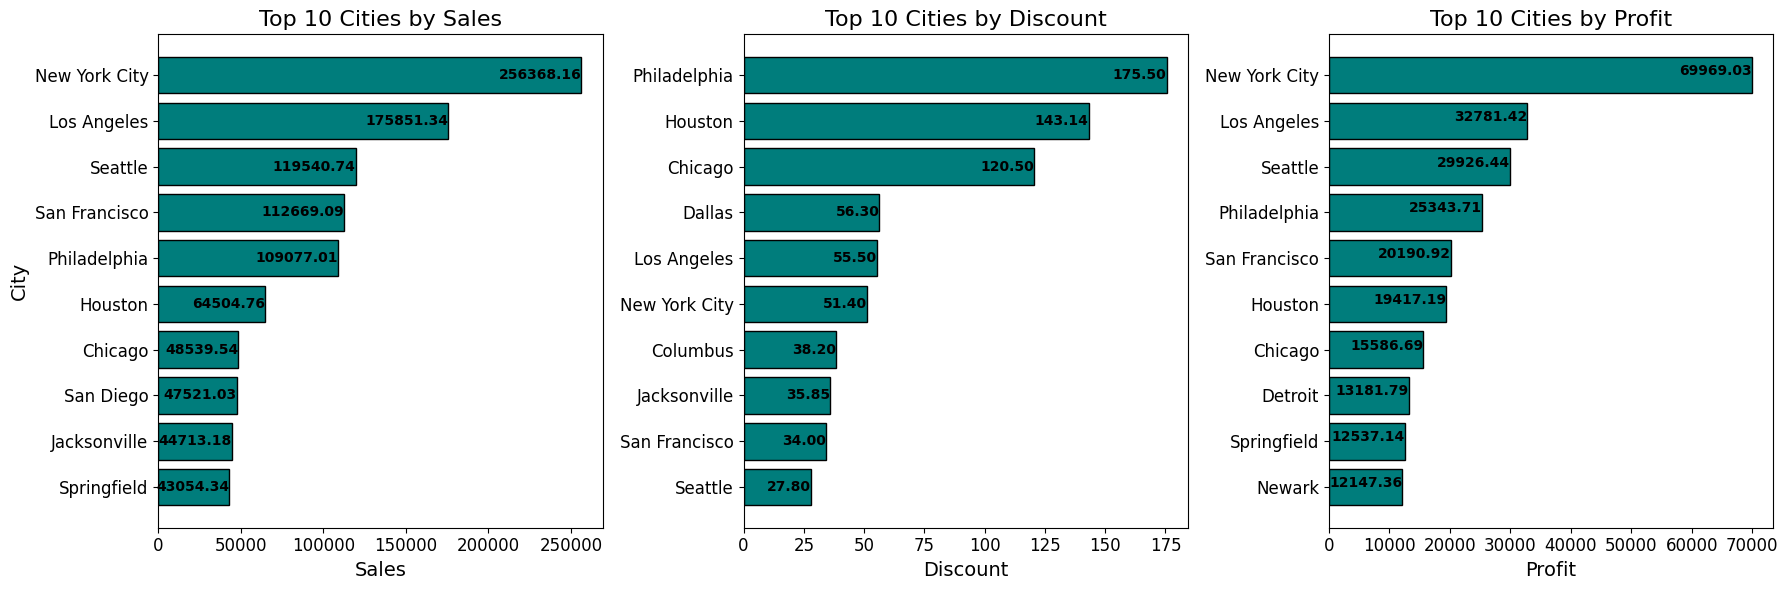

In [13]:
# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Get the top 10 cities by sales, discount, and profit
top_city_sales = df.groupby('City')['Sales'].sum().nlargest(10).reset_index()
top_city_discount = df.groupby('City')['Discount'].sum().nlargest(10).reset_index()
top_city_profit = df.groupby('City')['Profit'].sum().nlargest(10).reset_index()

# Create the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for Sales
axes[0].barh(top_city_sales['City'], top_city_sales['Sales'], color='#007d7c', edgecolor='black', linewidth=1)
axes[0].set_title('Top 10 Cities by Sales', fontsize=16)
axes[0].set_xlabel('Sales', fontsize=14)
axes[0].set_ylabel('City', fontsize=14)
axes[0].invert_yaxis()
axes[0].tick_params(axis='both', which='major', labelsize=12)
for i, v in enumerate(top_city_sales['Sales']):
    axes[0].text(v, i, f'{v:.2f}', va='center', ha='right', fontsize=10, color='black', fontweight='bold')

# Plot for Discount
axes[1].barh(top_city_discount['City'], top_city_discount['Discount'], color='#007d7c', edgecolor='black', linewidth=1)
axes[1].set_title('Top 10 Cities by Discount', fontsize=16)
axes[1].set_xlabel('Discount', fontsize=14)
axes[1].invert_yaxis()
axes[1].tick_params(axis='both', which='major', labelsize=12)
for i, v in enumerate(top_city_discount['Discount']):
    axes[1].text(v, i, f'{v:.2f}', va='center', ha='right', fontsize=10, color='black', fontweight='bold')

# Plot for Profit
axes[2].barh(top_city_profit['City'], top_city_profit['Profit'], color='#007d7c', edgecolor='black', linewidth=1)
axes[2].set_title('Top 10 Cities by Profit', fontsize=16)
axes[2].set_xlabel('Profit', fontsize=14)
axes[2].invert_yaxis()
axes[2].tick_params(axis='both', which='major', labelsize=12)
for i, v in enumerate(top_city_profit['Profit']):
    axes[2].text(v, i, f'{v:.2f}', ha='right', fontsize=10, color='black', fontweight='bold')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()


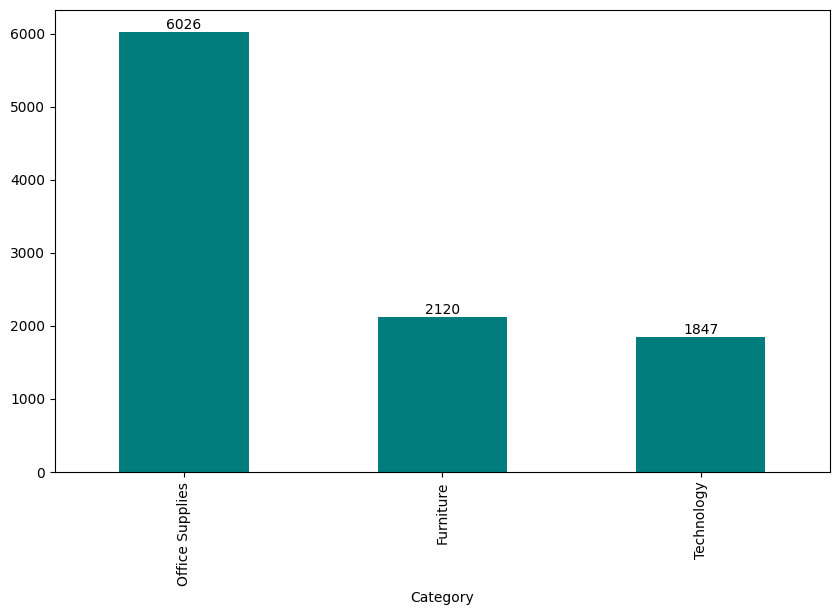

In [14]:
# create a bar chart
plt.figure(figsize=(10, 6))
df['Category'].value_counts().plot(kind='bar', color='#007d7c')
# print values on the bars
for i, v in enumerate(df['Category'].value_counts()):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom')
# show the plot
plt.show()

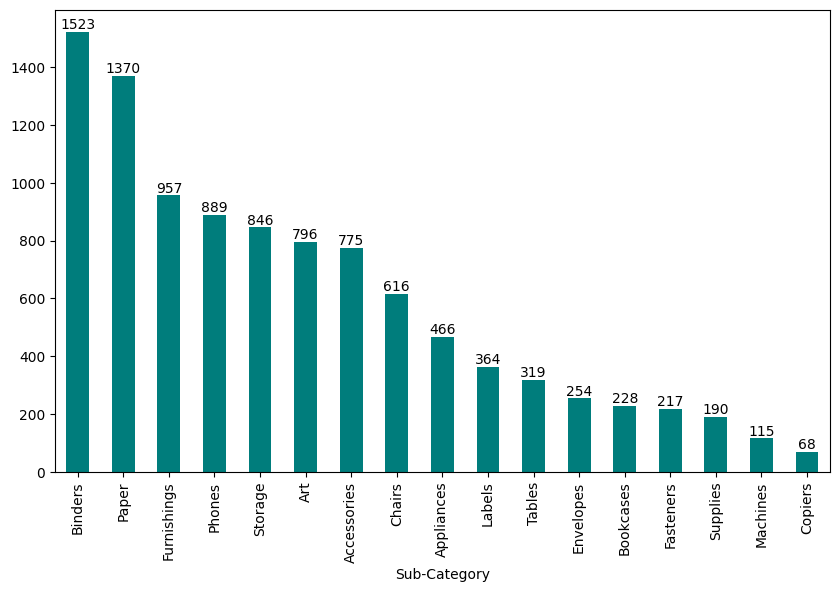

In [15]:
plt.figure(figsize=(10,6))
df['Sub-Category'].value_counts().plot(kind='bar', color='#007d7c')
# print values on the bars
for i, v in enumerate(df['Sub-Category'].value_counts()):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom')

# show the plot
plt.show()


<Axes: ylabel='count'>

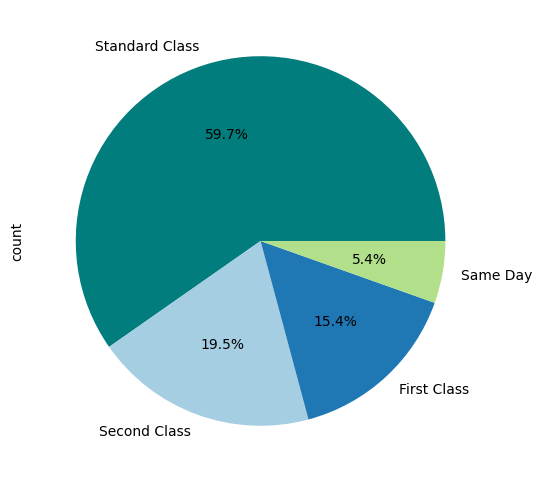

In [16]:
# create pie chart
plt.figure(figsize=(10, 6))
df['Ship Mode'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#007d7c', '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c'])

# show the plot


In [ ]:
df['Segment'].value_counts()

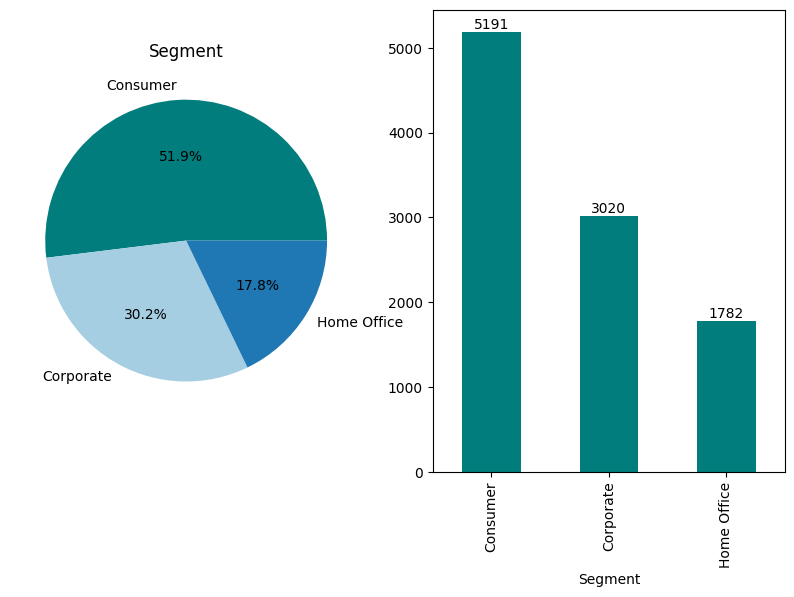

In [19]:
# create Mosaic Plot:
plt.figure(figsize=(10, 6))

# create the mosaic plot
plt.subplot(1, 2, 1)
plt.title('Segment')
plt.pie(df['Segment'].value_counts(), labels=df['Segment'].value_counts().index, autopct='%1.1f%%', colors=['#007d7c', '#a6cee3', '#1f78b4'])

# create the bar chart
plt.subplot(1, 2, 2)
df['Segment'].value_counts().plot(kind='bar', color='#007d7c')
# print values on the bars
for i, v in enumerate(df['Segment'].value_counts()):
    # print values on the bars
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom')
# show the plot tom
plt.show()

In [17]:
# Group by Region, Category, and Sub-Category, and aggregate Sales, Discount, Profit
grouped = df.groupby(['Region', 'Category', 'Sub-Category']).agg({
'Sales': 'sum',
'Discount': 'mean',
'Profit': 'sum'
}).reset_index()

# Melt the DataFrame to combine Sales, Discount, Profit into a single variable
melted = pd.melt(grouped, id_vars=['Region', 'Category', 'Sub-Category'],
value_vars=['Sales', 'Discount', 'Profit'],
var_name='Metric', value_name='Value')

# Create sunburst plot using Plotly Express
fig = px.sunburst(melted, path=['Region', 'Category', 'Sub-Category', 'Metric'],
values='Value', color='Value',
color_continuous_scale='RdBu',
title='Sales, Discount, and Profit Sunburst Plot')

# Update layout
fig.update_layout(margin=dict(t=10, l=0, r=0, b=0))

# Show plot (or save it as HTML)
fig.show()

## <b> <span style='color:#e67e22'>Step 16</span> <span style='color:'>|</span> <span style='color:#e74c3c ;font-style: italic;animation: pulse 2s infinite;'>Build Model in Pipeline</span></b>


In [20]:
# Separate features and target
X = df.drop(['Discount', 'Order Date', 'Product Name'], axis=1)
y = df['Discount']

# Automatically select categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42))])

# Define the hyperparameter grid for XGBoost and PCA components
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.05, 0.1, 0.5],
    'model__max_depth': [3, 5, 7],
}

if len(numerical_cols) > 0:
    param_grid['preprocessor__num__pca__n_components'] = [0.95, 0.99, len(numerical_cols)]

# Setup GridSearchCV
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Evaluate the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'preprocessor__num__pca__n_components': 0.95}
Mean Squared Error: 0.000251837316557181
R^2 Score: 0.9942683696744221


## <b> <span style='color:#e67e22'>Step 17</span> <span style='color:'>|</span> <span style='color:#e74c3c ;font-style: italic;animation: pulse 2s infinite;'>Save Model & predict custom values</span></b>


In [21]:
# save model
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


In [22]:
# predict custom data by model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# create the new data with all required columns
new_data = pd.DataFrame({
    'Quantity': [1],
    'Sales': [100],
    'Profit': [50],
    'Region': ['Central'],
    'Category': ['Furniture'],
    'Sub-Category': ['Bookcases'],
    'Ship Mode': ['Standard Class'],
    'Segment': ['Consumer'],
    'City': ['Springfield'],
    'State': ['Illinois']
})

prediction = model.predict(new_data)
print("Discount is : ",prediction)

Discount is :  [0.30894935]


# **Thank You!**